In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
import warnings 
warnings.filterwarnings('ignore')
import tensorflow as tf 
print('Num GPUs Available:', len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available: 1


In [11]:
#Data Preprocessing

(X_train, y_train),(X_test, y_test) = mnist.load_data()

input_dim = 784
output_dim = nb_classes = 10 
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [13]:
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

In [15]:
X_train[0].shape

(784,)

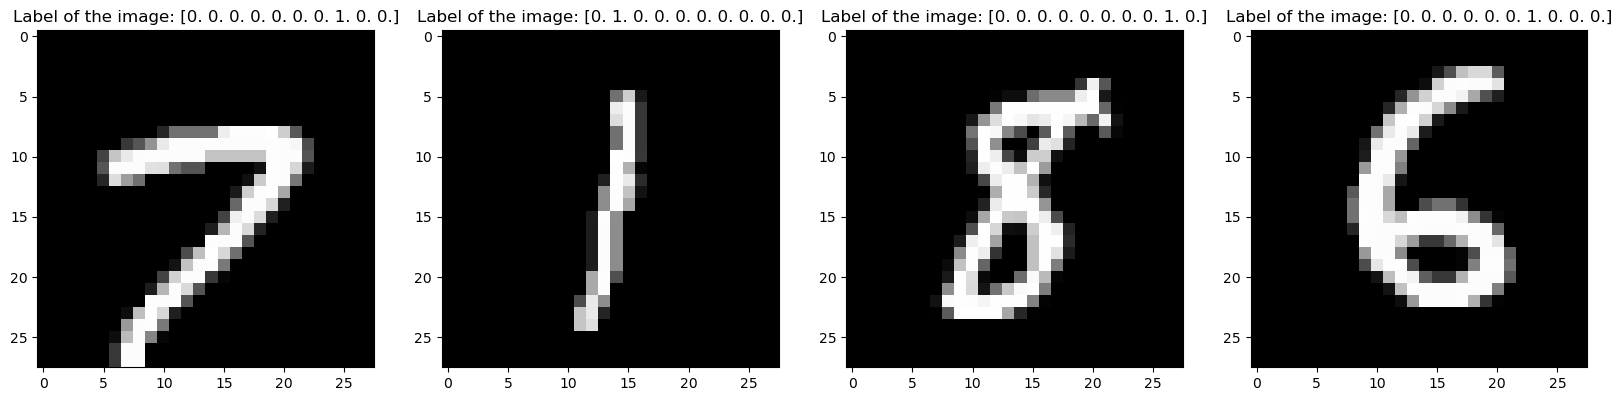

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

In [19]:
model = Sequential()
# The first dense layer
model.add(Dense(1028, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(1028, activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

2024-09-19 20:11:53.514165: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-09-19 20:11:53.514214: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-09-19 20:11:53.514224: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-09-19 20:11:53.514290: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-19 20:11:53.514319: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1028)           │       806,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1028)           │     1,057,812 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,875,082 (7.15 MB)

 Trainable params: 1,875,082 (7.15 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20


2024-09-19 20:35:01.556628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6575 - loss: 1.5368
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8819 - loss: 0.4684
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9033 - loss: 0.3565
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9135 - loss: 0.3080
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9193 - loss: 0.2846
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9237 - loss: 0.2645
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9285 - loss: 0.2523
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9336 - loss: 0.2378
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9368 - loss: 0.2265
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9396 - loss: 0.2137
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9422 - loss: 0.2055
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accurac

In [32]:
#evaluating the score 
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.14609183371067047
Test accuracy: 0.9577999711036682


In [34]:
model_2 = Sequential()

model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

In [44]:
model_2.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
history = model_2.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))




Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3497 - loss: 2.0154 - val_accuracy: 0.7893 - val_loss: 0.8789
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8057 - loss: 0.7637 - val_accuracy: 0.8617 - val_loss: 0.5152
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8648 - loss: 0.5004 - val_accuracy: 0.8844 - val_loss: 0.4178
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8819 - loss: 0.4221 - val_accuracy: 0.8932 - val_loss: 0.3770
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8910 - loss: 0.3813 - val_accuracy: 0.8987 - val_loss: 0.3486
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8997 - loss: 0.3546 - val_accuracy: 0.9050 - val_loss: 0.3312
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9016 - loss: 0.3429 - val_accuracy: 0.9092 - val_loss: 0.3175
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9080 - loss: 0.3201 - val_accuracy: 0.

In [60]:
# Evaluate the model
score_2 = model_2.evaluate(X_test, y_test, verbose=0)
print('Test score:', score_2[0])
print('Test accuracy:', score_2[1])

Test score: 0.21679560840129852
Test accuracy: 0.9369000196456909


In [54]:
model_3 = Sequential()
model_3.add(Dense(1024, activation='relu'))
model_3.add(Dense(512, activation='relu'))
model_3.add(Dense(256, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

In [56]:
model_3.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

In [58]:
history_3 = model_3.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4646 - loss: 1.8080 - val_accuracy: 0.8778 - val_loss: 0.4575
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8920 - loss: 0.3989 - val_accuracy: 0.9157 - val_loss: 0.2946
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9181 - loss: 0.2866 - val_accuracy: 0.9301 - val_loss: 0.2451
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9345 - loss: 0.2320 - val_accuracy: 0.9409 - val_loss: 0.2076
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9426 - loss: 0.2027 - val_accuracy: 0.9481 - val_loss: 0.1826
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9490 - loss: 0.1823 - val_accuracy: 0.9531 - val_loss: 0.1621
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9555 - loss: 0.1560 - val_accuracy: 0.9539 - val_loss: 0.1616
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9586 - loss: 0.1441 - val_accu

In [ ]:
score_3 = model_3.evaluate(X_test, y_test, verbose=0)
print('Test score')